In [41]:
from qiskit import *
import matplotlib

In [42]:
s = '1101'
n = len(s)

circuit = QuantumCircuit(n+1,n)

In [43]:
circuit.x(n)

circuit.barrier()


circuit.h(range(n+1))

circuit.barrier()

for ii, yesno in enumerate(reversed(s)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier()

circuit.h(range(n+1))

circuit.barrier()

circuit.measure(range(n), range(n))

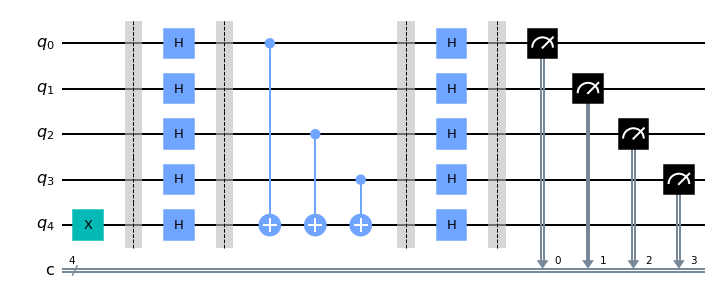

In [44]:
circuit.draw(output='mpl')

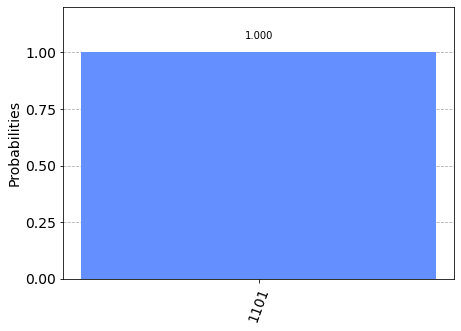

In [45]:

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [46]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

ibmqfactory.load_account:WARNING:2021-06-02 03:08:20,219: Credentials are already in use. The existing account in the session will be replaced.


In [47]:
qcomp = provider.get_backend('ibmq_athens')

In [48]:
job = execute(circuit, backend=qcomp)

In [49]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


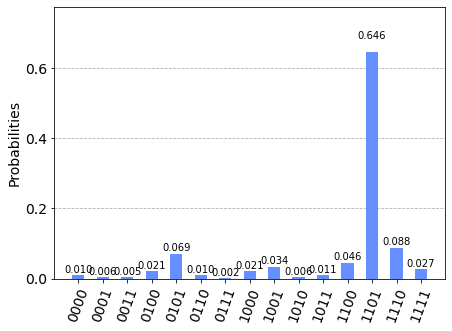

In [50]:
result = job.result()
plot_histogram(result.get_counts(circuit))